## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.DataFrame.merge(mouse_metadata_df, study_results_df)

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Check the number of mice.
mouse_count_unique = combined_df["Mouse ID"].nunique()
mouse_count = combined_df["Mouse ID"].count()
print(f"The number of mice is: {mouse_count}")
print(f"The number of unique mice is: {mouse_count_unique}")

The number of mice is: 1893
The number of unique mice is: 249


In [5]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
erase_dup = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep ='first', inplace=True)
erase_dup

In [6]:
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Recheck the number of mice
mouse_count_unique2 = combined_df["Mouse ID"].nunique()
mouse_count2 = combined_df["Mouse ID"].count()
print(f"The number of mice is: {mouse_count2}")
print(f"The number of unique mice is: {mouse_count_unique2}")

The number of mice is: 1888
The number of unique mice is: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_group = combined_df.groupby(["Drug Regimen"])
mean = regimen_group["Tumor Volume (mm3)"].mean()
median = regimen_group["Tumor Volume (mm3)"].median()
std = regimen_group["Tumor Volume (mm3)"].std()
var = regimen_group["Tumor Volume (mm3)"].var()
sem = regimen_group["Tumor Volume (mm3)"].sem() 

summary = pd.DataFrame({"Mean": mean, "Median": median,
                        "Standard Deviation": std, "Variance": var,
                        "SEM": sem})
summary

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

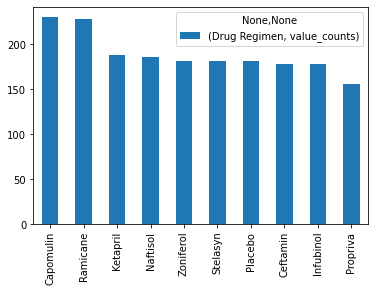

In [9]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen


counts = combined_df.agg({"Drug Regimen": ["value_counts"]})
counts.plot(kind="bar")


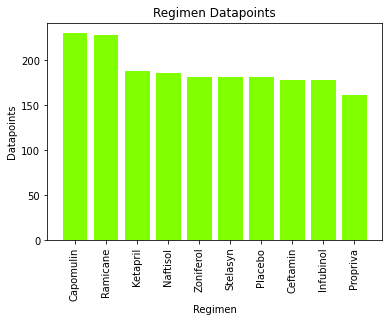

In [10]:
# General identical bar plot using pyplot instead of pandas.

regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", 
            "Placebo", "Ceftamin", "Infubinol", "Propriva"]
stats = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(regimens))
plt.bar(x_axis, stats, color='chartreuse', align='center')
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, regimens)
plt.xticks(rotation=90)
plt.ylabel("Datapoints")
plt.xlabel("Regimen")
plt.title("Regimen Datapoints")

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc922df91d0>],
      dtype=object)

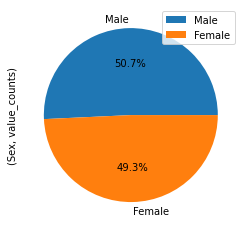

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = combined_df.agg({"Sex": ["value_counts"]})
counts.plot(kind="pie", subplots=True, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7fc92653e5c0>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

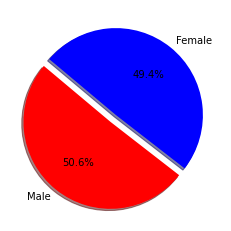

In [12]:
# Generate identical pie plot using pyplot

labels = ["Male", "Female"]
sizes = [958, 935]
colors = ["red", "blue"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#combined_df["Sex"].value_counts()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Isolate individual drug regimens
cap = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ram = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
inf = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
cef = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

#Group regimens based on max timepoint and adjacent value to that timepoint
capfinal = cap.groupby('Mouse ID').max()['Timepoint']
captumor = pd.DataFrame(capfinal)
capmerge = pd.merge(captumor, combined_df, on=("Mouse ID","Timepoint"),how="left")


#Repeat this for each drug regimen and merge to df
ramfinal = ram.groupby('Mouse ID').max()['Timepoint']
ramtumor = pd.DataFrame(ramfinal)
rammerge = pd.merge(ramtumor, combined_df, on=("Mouse ID","Timepoint"),how="left")
#rammerge.head(5)

inffinal = inf.groupby('Mouse ID').max()['Timepoint']
inftumor = pd.DataFrame(inffinal)
infmerge = pd.merge(inftumor, combined_df, on=("Mouse ID","Timepoint"),how="left")
#infmerge.head(5)

ceffinal = cef.groupby('Mouse ID').max()['Timepoint']
ceftumor = pd.DataFrame(ceffinal)
cefmerge = pd.merge(ceftumor, combined_df, on=("Mouse ID","Timepoint"),how="left")
#cefmerge.head(5)

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
capmerge

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [63]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

#capumulin
cap_tum = capmerge["Tumor Volume (mm3)"]

quartiles_cap = cap_tum.quantile([.25,.5,.75])
upperq_cap = quartiles_cap[0.75]
lowerq_cap = quartiles_cap[0.25]
iqr_cap = upperq_cap-lowerq_cap

upper_bound_cap = upperq_cap + (1.5*iqr_cap)
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
print(f"The upper bound for capomulin is {upper_bound_cap} and the lower bound for capumulin is {lower_bound_cap}.")

#ramicane
ram_tum = rammerge["Tumor Volume (mm3)"]

quartiles_ram = ram_tum.quantile([.25,.5,.75])
upperq_ram = quartiles_ram[0.75]
lowerq_ram = quartiles_ram[0.25]
iqr_ram = upperq_ram-lowerq_ram

upper_bound_ram = upperq_ram + (1.5*iqr_ram)
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
print(f"The upper bound for ramicane is {upper_bound_ram} and the lower bound for ramicane is {lower_bound_ram}.")

#infubinol
inf_tum = infmerge["Tumor Volume (mm3)"]

quartiles_inf = inf_tum.quantile([.25,.5,.75])
upperq_inf = quartiles_inf[0.75]
lowerq_inf = quartiles_inf[0.25]
iqr_inf = upperq_inf-lowerq_inf

upper_bound_inf = upperq_inf + (1.5*iqr_inf)
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
print(f"The upper bound for infubinol is {upper_bound_inf} and the lower bound for infubinol is {lower_bound_inf}.")

#ceftamin
cef_tum = cefmerge["Tumor Volume (mm3)"]

quartiles_cef = cef_tum.quantile([.25,.5,.75])
upperq_cef = quartiles_cef[0.75]
lowerq_cef = quartiles_cef[0.25]
iqr_cef = upperq_cef-lowerq_cef

upper_bound_cef = upperq_cef + (1.5*iqr_cef)
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
print(f"The upper bound for ceftamin is {upper_bound_cef} and the lower bound for ceftamin is {lower_bound_cef}.")

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The upper bound for capomulin is 51.83201549 and the lower bound for capumulin is 20.70456164999999.
The upper bound for ramicane is 54.30681135 and the lower bound for ramicane is 17.912664470000003.
The upper bound for infubinol is 82.74144559000001 and the lower bound for infubinol is 36.83290494999999.
The upper bound for ceftamin is 87.66645829999999 and the lower bound for ceftamin is 25.355449580000002.


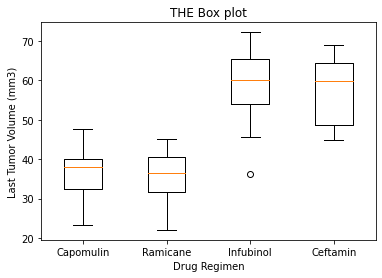

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

box = [cap_tum, ram_tum, inf_tum, cef_tum]
fig1, ax1 = plt.subplots()
ax1.set_title('THE Box plot')
ax1.set_ylabel('Last Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()



## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights